In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, normalize


In [4]:
print('hello there')

data_src = "./football_data.csv"
df = pd.read_csv(data_src, )


hello there


In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [43]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [18]:
def calculate_distance(attributes,weights,a,b):
    distance = 0
    for i, x in enumerate(attributes):
        temp = weights[i]*(a[x] - b[x])
        distance += temp**2
    return np.sqrt(distance)

In [19]:
def kmeans(df, k=5,attributes=['Overall','Age',],attribute_weights = [1,1]):
    filters = attributes
    df.fillna(method ='ffill', inplace = True)
    df_filtered = df[filters]

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_filtered)

    df_normalized = normalize(df_scaled)

    df_normalized = pd.DataFrame(df_normalized)

    #PCA to reduce dimensionality to 2 features
    pca = PCA(n_components = 2)
    df_principal = pca.fit_transform(df_normalized)
    df_principal = pd.DataFrame(df_principal)
    df_principal.columns = ['P1', 'P2']

    df = df_principal
    attributes = ['P1', 'P2']

    cluster_means = df.sample(n=k)[attributes]

    prev_means = pd.DataFrame(columns=attributes)
    cluster=[]
    itercount=0
    while not cluster_means[attributes].equals(prev_means[attributes]):
        itercount+=1
        print(itercount,end=' ')
        cluster=[]
        for i, r in df.iterrows():
            all_distances=[]
            for j, means in cluster_means.iterrows():
                distance = calculate_distance(attributes,attribute_weights,r,means)
                all_distances.append(distance)
            mindist = min(all_distances)
            cluster.append(all_distances.index(mindist))

        new_cluster = np.array(cluster)
        new_cluster_means=[]
        # print(new_cluster)
        for i in range(k):
            single_cluster = np.where(new_cluster==i)
            # print(single_cluster)
            single_cluster_values = df.iloc[single_cluster]
            new_mean_attributes = []
            for j in attributes:
                new_mean_attributes.append(np.mean(single_cluster_values[j]))

            new_cluster_means.append(new_mean_attributes)

        prev_means = cluster_means.copy()
        cluster_means = pd.DataFrame(new_cluster_means,columns=attributes)
    return np.array(cluster)


1
1 2 9808.236591205636

2
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 6993.725872147862

3
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 5767.922693982629

4
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 4662.564964085732

5
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 4003.60318711617

6
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 3617.516785338364

7
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 3425.136474016578

8
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 3370.626017145478

9
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 3165.6599542768004


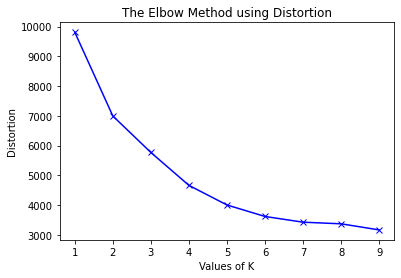

In [26]:
distortions =[]
K = range(1,10)
for i in K:
    print()
    print(i)
    attributes=['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
    attributes_weights = [1] * len(attributes)
    clusters = kmeans(df,k=i,attributes=attributes,attribute_weights=[1,1])
    new_cluster_means=[]
    for j in range(i):
        single_cluster = np.where(clusters==j)
        single_cluster_values = df.iloc[single_cluster]
        new_mean_attributes = []
        for j in attributes:
            new_mean_attributes.append(np.mean(single_cluster_values[j]))
        new_cluster_means.append(new_mean_attributes)

    cluster_means = pd.DataFrame(new_cluster_means,columns=attributes)
    distortion = 0
    for j, r in df.iterrows():
        curr_mean = cluster_means.iloc[clusters[j]]
        dist = calculate_distance(attributes,attributes_weights,r,curr_mean)
        distortion += dist**2
    distortion /= len(df)
    print(distortion)
    distortions.append(distortion)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Using the Elbow Method using Distortion we observe that the derivative of distortion (SSE) decreases in magnitude significanty after $k=5$ and any further improvements are minimal.
Therefore, **the "elbow" is at $k=5$.** 

In [31]:
attributes=['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
attributes_weights = [1] * len(attributes)
clusters = kmeans(df,k=5,attributes=attributes,attribute_weights=attributes_weights)



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [ ]:
filters = attributes
df.fillna(method ='ffill', inplace = True)
df_filtered = df[filters]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

df_normalized = normalize(df_scaled)

df_normalized = pd.DataFrame(df_normalized)

#PCA to reduce dimensionality to 2 features
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']

# df = df_principal
attributes = ['P1', 'P2']
df_principal['Cluster_id'] = clusters

fig = plt.figure(figsize=(20,15))
sns.scatterplot(data=df_principal, x='P1', y='P2', hue='Cluster_id', palette="cubehelix")
plt.show()

In [32]:
silhouette_scores = []
K = range(2,10)
for i in K:
    print()
    print(i)
    attributes=['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
    attributes_weights = [1] * len(attributes)
    clusters = kmeans(df,k=i,attributes=attributes,attribute_weights=[1,1])
    new_cluster_means=[]
    for j in range(i):
        single_cluster = np.where(clusters==j)
        single_cluster_values = df.iloc[single_cluster]
        new_mean_attributes = []
        for j in attributes:
            new_mean_attributes.append(np.mean(single_cluster_values[j]))
        new_cluster_means.append(new_mean_attributes)


    cluster_means = pd.DataFrame(new_cluster_means,columns=attributes)

    intra_dists = np.zeros((i))
    intra_dist_count = np.zeros((i))

    for j, r in df.iterrows():
        curr_mean = cluster_means.iloc[clusters[j]]
        dist = calculate_distance(attributes,attributes_weights,r,curr_mean)
        intra_dists[clusters[j]] += dist
        intra_dist_count[clusters[j]] += 1
    intra_dist = np.mean(intra_dists/intra_dist_count)
    print(intra_dist, end=' ')

    inter_dist = 0
    count=0
    for j in range(i-1):
        for l in range(j+1,i):
            curr_mean1 = cluster_means.iloc[j]
            curr_mean2 = cluster_means.iloc[l]
            dist = calculate_distance(attributes,attributes_weights,curr_mean1,curr_mean2)
            inter_dist +=dist
            count +=1

    inter_dist/=count
    print(inter_dist,end =' ')

    ss = (inter_dist-intra_dist)/max(inter_dist,intra_dist)
    silhouette_scores.append(ss)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette_scores')
plt.title('Silhouette scores method')
plt.show()



2
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 81.06562235713588 107.38970610582933 
3
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 70.96377602933488 108.00013282002594 
4
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 65.7216595569479 114.76841283446758 
5
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 60.63409918218281 114.28444815769967 
6
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56.65270834762868 112.10092023478968 
7
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

In [94]:
np.array([1,3,])/np.array([2,2,])

array([0.5, 1.5])